In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud nltk matplotlib pandas --quiet


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


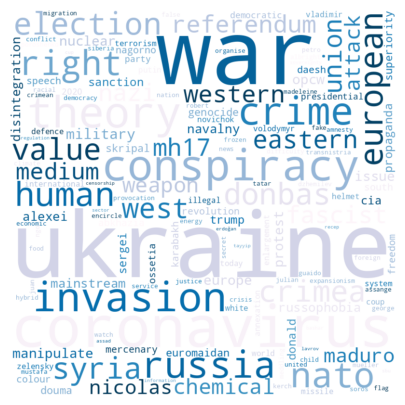

Trustworthy word cloud saved at /content/drive/MyDrive/ColabNotebooks_/dataset_analysis/clouds/trustworthy_wordcloud.png


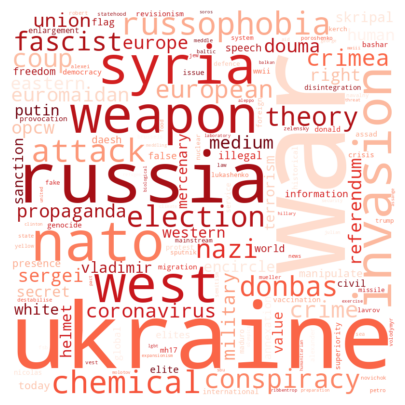

Disinformation word cloud saved at /content/drive/MyDrive/ColabNotebooks_/dataset_analysis/clouds/disinformation_wordcloud.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

custom_stop_words = ['said', 'would', 'also', 'one', 'can', 'like', 'get', 'make', 'even', 'people', 'know', 'anti', 'take', 'say']
stop_words = set(stopwords.words('english')) | set(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess(text_series):
    text = ' '.join(text_series.dropna().astype(str))
    tokens = re.findall(r'\b\w+\b', text.lower())
    tagged = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag))
        for word, pos_tag in tagged
    ]

    normalize_map = {
        'russian': 'russia',
        'ukrainian': 'ukraine',
        'syrian': 'syria'
    }
    lemmatized = [normalize_map.get(w, w) for w in lemmatized]

    filtered = [w for w in lemmatized if w not in stop_words and len(w) > 2]
    return filtered

# Input CSV files (replace with your file paths)
trustworthy_file_path = 'path/to/cleaned_trustworthy.csv'
disinfo_file_path = 'path/to/cleaned_disinformation.csv'

trustworthy_df = pd.read_csv(trustworthy_file_path)
disinfo_df = pd.read_csv(disinfo_file_path)

import numpy as np

class VerticalWordCloud(WordCloud):
    def draw(self, *args, **kwargs):
        self._draw_orientation = lambda *args: np.pi / 2
        return super().draw(*args, **kwargs)

trustworthy_words = preprocess(trustworthy_df['keywords'])
disinfo_words = preprocess(disinfo_df['keywords'])

trustworthy_word_freq = Counter(trustworthy_words)
disinfo_word_freq = Counter(disinfo_words)

trustworthy_wordcloud = VerticalWordCloud(
    width=800,
    height=800,
    background_color='white',
    max_words=150,
    colormap='PuBu',
    contour_width=3,
    contour_color='black'
).generate_from_frequencies(trustworthy_word_freq)

disinfo_wordcloud = VerticalWordCloud(
    width=800,
    height=800,
    background_color='white',
    max_words=150,
    colormap='Reds_r',
    contour_width=3,
    contour_color='black'
).generate_from_frequencies(disinfo_word_freq)

trustworthy_save_path = 'path/to/data'
disinfo_save_path = 'path/to/data'

plt.figure(figsize=(10, 5))
plt.imshow(trustworthy_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(trustworthy_save_path, bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(disinfo_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(disinfo_save_path, bbox_inches='tight', dpi=300)
plt.show()


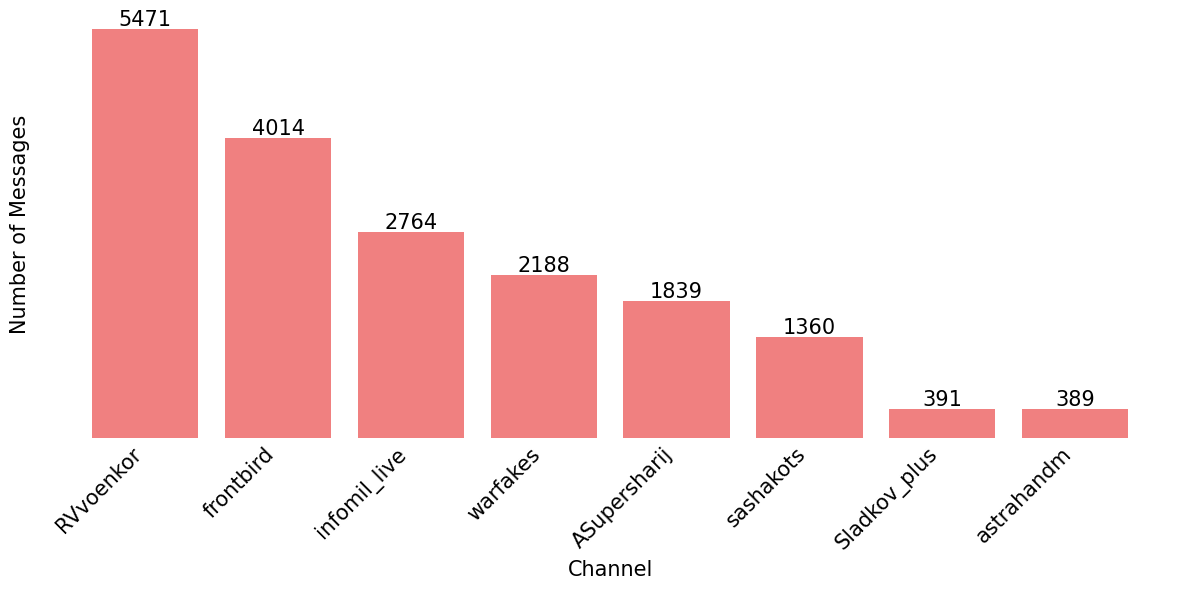

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('path/to/final_merged_dataset.csv')

message_counts = df['author'].value_counts()
message_counts = message_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(message_counts.index, message_counts.values, color='lightcoral')

plt.xticks(rotation=45, ha='right', fontsize=15)
plt.gca().set_yticklabels([])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=15)

plt.xlabel("Channel", fontsize=15)
plt.ylabel("Number of Messages", fontsize=15)

plt.tight_layout()

# Save the plot
output_path = 'path/to/message_counts_per_channel.png'
plt.savefig(output_path, dpi=300)
plt.show()


In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.6 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('punkt', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

file_path = 'data_analysis/summaries.csv'
df = pd.read_csv(file_path)

custom_stop_words = [
    'said', 'would', 'also', 'one', 'can', 'like', 'get', 'make', 'even',
    'people', 'know', 'anti', 'see', 'go', 'take', 'think', 'want', 'show',
    'use', 'come', 'say', 'tell', 'need', 'find', 'give', 'help', 'ask',
    'seem', 'work', 'try', 'feel', 'be', 'am', 'is', 'are', 'was', 'were',
    'been', 'being', 'have', 'has', 'had', 'having', 'rt'
]
stop_words = set(stopwords.words('english')) | set(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens if word not in stop_words and word.isalpha()
    ]
    return ' '.join(tokens)

columns_to_analyze = ['resolved_text', 'text', 'best_summary']
for col in columns_to_analyze:
    print(f"Processing column: {col}")

    df_clean = df[col].apply(preprocess_text)

    vectorizer = CountVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df_clean)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)

    vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer)
    print(f"Visualization ready for column: {col}")
    pyLDAvis.display(vis)

    pyLDAvis.save_html(vis, f"data_analysis/{col}_lda_vis.html")


Processing column: resolved_text
Visualization ready for column: resolved_text
Processing column: text
Visualization ready for column: text
Processing column: best_summary
Visualization ready for column: best_summary


The LDA please find in the Sharepoint folder.

In [ ]:
!pip uninstall -y nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


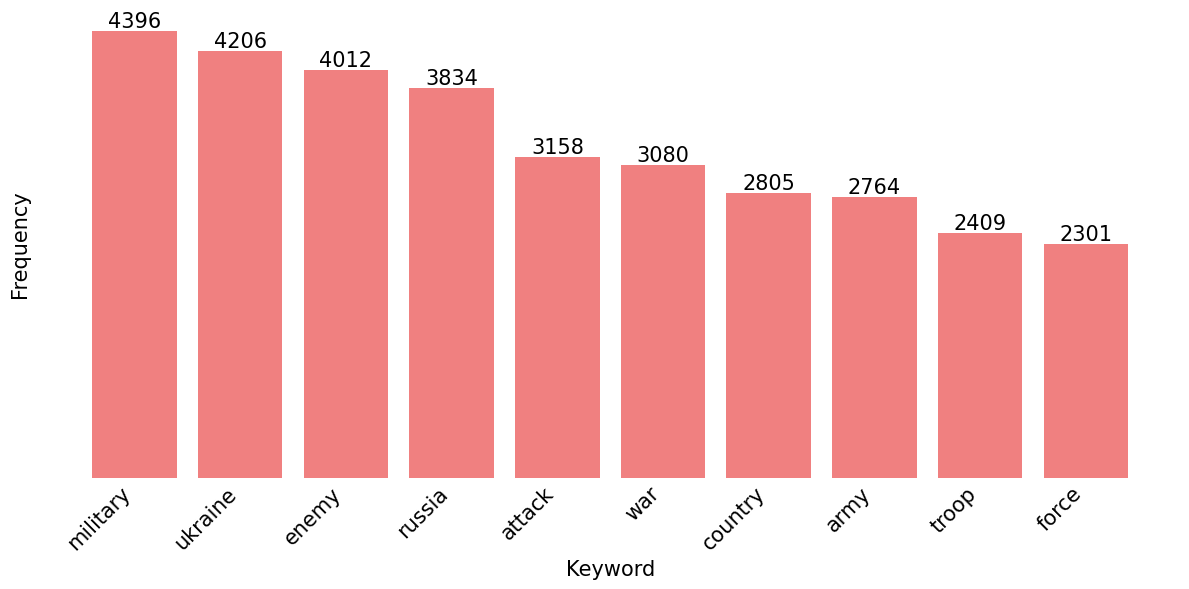

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

df = pd.read_csv('path/to/final_merged_dataset.csv')

nlp = spacy.load('en_core_web_sm')

custom_stopwords = {'ukrainian', 'bird', 's', 'year', 'day', 'new', 'area', 'region', 'apos', 'russian', 'apo', 'time'}

def extract_keywords(texts):
    keywords = []
    for doc in nlp.pipe(texts.astype('str'), disable=["parser", "ner"]):
        for token in doc:
            if (token.pos_ in ('NOUN', 'PROPN', 'ADJ')
                and not token.is_stop
                and token.is_alpha
                and token.lemma_.lower() not in custom_stopwords):
                keywords.append(token.lemma_.lower())
    return keywords

keywords = extract_keywords(df['translated_message'])

keyword_counts = Counter(keywords)
top_keywords = keyword_counts.most_common(10)

kw_df = pd.DataFrame(top_keywords, columns=['keyword', 'count'])

plt.figure(figsize=(12, 6))
bars = plt.bar(kw_df['keyword'], kw_df['count'], color='lightcoral')

plt.xticks(rotation=45, ha='right', fontsize=15)
plt.gca().set_yticklabels([])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
             ha='center', va='bottom', fontsize=15)

plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.tight_layout()

output_path = 'path/to/top_keywords.png'
plt.savefig(output_path, dpi=300)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


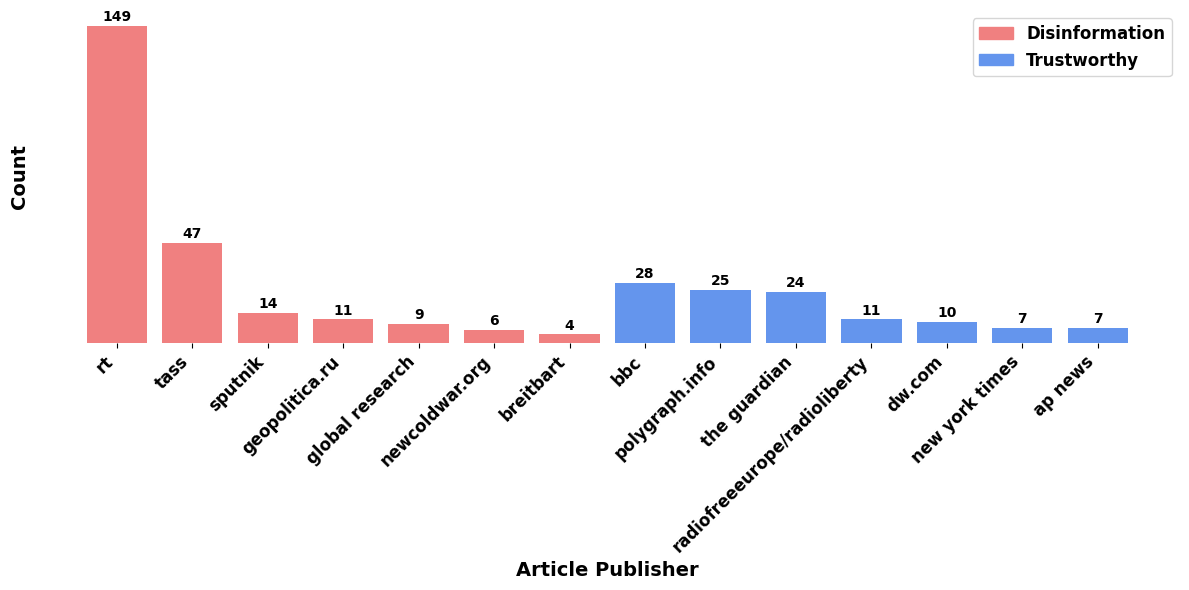

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

trustworthy_path = 'path/to/cleaned_trustworthy.csv'
disinfo_path = 'path/to/cleaned_disinformation.csv'
df_trust = pd.read_csv(trustworthy_path)
df_disinfo = pd.read_csv(disinfo_path)

trust_top = df_trust['article_publisher'].value_counts().head(7)
disinfo_top = df_disinfo['article_publisher'].value_counts().head(7)

trust_df = pd.DataFrame({
    'publisher': trust_top.index,
    'count': trust_top.values,
    'label': 'Trustworthy'
})

disinfo_df = pd.DataFrame({
    'publisher': disinfo_top.index,
    'count': disinfo_top.values,
    'label': 'Disinformation'
})

combined_df = pd.concat([disinfo_df, trust_df], ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 6))

colors = {'Disinformation': 'lightcoral', 'Trustworthy': 'cornflowerblue'}

bars = ax.bar(
    x=range(len(combined_df)),
    height=combined_df['count'],
    color=[colors[label] for label in combined_df['label']]
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, str(height),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(range(len(combined_df)))
ax.set_xticklabels(combined_df['publisher'], rotation=45, ha="right", fontsize=12, fontweight='bold')

ax.set_xlabel("Article Publisher", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')
ax.set_yticks([])
ax.grid(False)

for spine in ax.spines.values():
    spine.set_visible(False)

handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors]
legend = ax.legend(handles, colors.keys(), fontsize=12)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('path/to/merged_disinfo_trustworthy.csv')

publisher_counts = df.groupby(['article_publisher', 'label']).size().unstack(fill_value=0)

publisher_counts['total'] = publisher_counts.sum(axis=1)
publisher_counts['disinfo'] = publisher_counts['disinfo']

publisher_counts = publisher_counts.sort_values(by='disinfo', ascending=False)

print(publisher_counts[['disinfo', 'total']].head(7))


label              disinfo  total
article_publisher                
rt                     149    149
tass                    47     47
sputnik                 14     14
geopolitica.ru          11     11
global research          9      9
newcoldwar.org           6      6
breitbart                4      4


In [ ]:
import pandas as pd

df = pd.read_csv('path/to/merged_disinfo_trustworthy.csv')

total_articles = df.shape[0]

print(f"Total articles in the dataset: {total_articles}")


Всего статей в датасете: 580


In [ ]:
import pandas as pd

data = {
    'article_publisher': ['rt', 'tass', 'sputnik', 'geopolitica.ru', 'global research', 'newcoldwar.org', 'breitbart'],
    'disinfo': [149, 47, 14, 11, 9, 6, 4],
    'total': [149, 47, 14, 11, 9, 6, 4]
}

df = pd.DataFrame(data)

total_articles = 580

df['disinfo_ratio'] = df['total'] / total_articles

print(df[['article_publisher', 'disinfo', 'total', 'disinfo_ratio']])


  article_publisher  disinfo  total  disinfo_ratio
0                rt      149    149       0.256897
1              tass       47     47       0.081034
2           sputnik       14     14       0.024138
3    geopolitica.ru       11     11       0.018966
4   global research        9      9       0.015517
5    newcoldwar.org        6      6       0.010345
6         breitbart        4      4       0.006897


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'article_publisher': ['rt', 'tass', 'sputnik', 'geopolitica.ru', 'global research', 'newcoldwar.org', 'breitbart'],
    'disinfo': [149, 47, 14, 11, 9, 6, 4],
    'total': [149, 47, 14, 11, 9, 6, 4]
}

df = pd.DataFrame(data)

total_articles = 580

df['disinfo_ratio'] = (df['total'] / total_articles)

def generate_barplot(dataframe, filename):
    publishers = dataframe['article_publisher']
    disinfo_ratios = dataframe['disinfo_ratio']

    fig, ax = plt.subplots(1, figsize=(10, 6))

    bars = ax.bar(publishers, disinfo_ratios, color='lightcoral')

    ax.set_xticks(range(len(publishers)))
    ax.set_xticklabels(publishers, rotation=45, ha="right", fontweight='bold', fontsize=12)

    ax.set_ylabel("Ratio", fontweight='bold', fontsize=14)
    ax.set_xlabel("Publishers", fontweight='bold', fontsize=14)

    for bar, ratio in zip(bars, disinfo_ratios):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{ratio:.2f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.grid(False)
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', transparent=True)
    plt.close()

generate_barplot(df, 'disinfo_ratio_plot.png')


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

file_path = '/content/drive/MyDrive/ColabNotebooks_/dataset_analysis/cleaned_disinformation.csv'
df = pd.read_csv(file_path)

custom_stop_words = [
    'said', 'would', 'also', 'one', 'can', 'like', 'get', 'make', 'even',
    'people', 'know', 'anti', 'see', 'go', 'take', 'think', 'want', 'show',
    'use', 'come', 'say', 'tell', 'need', 'find', 'give', 'help', 'ask',
    'seem', 'work', 'try', 'feel', 'be', 'am', 'is', 'are', 'was', 'were',
    'been', 'being', 'have', 'has', 'had', 'having', 'rt'
]
stop_words = set(stopwords.words('english')) | set(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def normalize_word(word):
    normalize_map = {
        'russian': 'russia',
        'ukrainian': 'ukraine',
        'syrian': 'syria'
    }
    return normalize_map.get(word, word)

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized = []
    for word, tag in tagged_tokens:
        if word.isalpha() and word not in stop_words:
            wn_tag = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(word, wn_tag)
            normalized = normalize_word(lemma)
            lemmatized.append(normalized)
    return ' '.join(lemmatized)

publishers_to_process = ['rt', 'tass', 'sputnik', 'geopolitica.ru', 'global research',
                         'newcoldwar.org', 'breitbart', 'president of russia',
                         'counterpunch.org', 'whatdoesitmean.com']

for publisher in publishers_to_process:
    print(f"Processing publisher: {publisher}")

    publisher_df = df[df['article_publisher'] == publisher].copy()

    publisher_df['processed_text'] = publisher_df['text'].apply(preprocess_text)

    non_empty_text = publisher_df['processed_text'].str.strip().notnull() & (publisher_df['processed_text'] != "")
    if non_empty_text.sum() == 0:
        print(f"No valid text to process for publisher: {publisher}")
        continue

    vectorizer = CountVectorizer(max_features=1000)
    X = vectorizer.fit_transform(publisher_df.loc[non_empty_text, 'processed_text'])

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)

    print(f"Top words for each topic for publisher: {publisher}")
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Processing publisher: rt


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


RT: "Syria-Russia Relations"

TASS: "MH17 & Ukraine Conflict"

Sputnik: "Ukraine-Russia Conflict"

Geopolitica.ru: "Hybrid Warfare & Russia"

Global Research: "Middle East Conflict & Syria"

Newcoldwar.org: "Ukraine & Crimean Crisis"

Breitbart: "Eastern European Tensions"


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
 nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown..

KeyboardInterrupt: Interrupted by user

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root

True

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load dataset
file_path = '/final_merged_dataset.csv'
df = pd.read_csv(file_path)

# Telegram channels to process
sources = [
    "warfakes", "ASupersharij", "sashakots", "RVvoenkor", "Sladkov_plus",
    "astrahandm", "frontbird", "infomil_live"
]

# Custom stopwords including some conversational and noisy words
custom_stop_words = [
    'said', 'would', 'also', 'one', 'can', 'like', 'get', 'make', 'even',
    'people', 'know', 'anti', 'see', 'go', 'take', 'think', 'want', 'show',
    'use', 'come', 'say', 'tell', 'need', 'find', 'give', 'help', 'ask',
    'seem', 'work', 'try', 'feel', 'be', 'am', 'is', 'are', 'was', 'were',
    'been', 'being', 'have', 'has', 'had', 'having', 'rt', 'ukrainian', 'bird',
    's', 'year', 'day', 'new', 'area', 'region', 'apos', 'russian', 'apo',
    'time', 'na', 'gon', 'hoo', 'ty', 'np', 'kk', 'pon', 'pf', 'uh', 'oh',
    'ha', 'ba', 'tg',

    # Conversational/Reaction words
    'okay', 'yeah', 'whoa', 'fuck', 'good', 'well', 'sure', 'already', 'leave',

    # Noise or uninformative words
    'sign', 'report', 'write', 'read', 'go', 'talk', 'say', 'video', 'photo'
]

stop_words = set(stopwords.words('english')) | set(custom_stop_words)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

def normalize_word(word):
    return {
        'russian': 'russia',
        'ukrainian': 'ukraine'
    }.get(word, word)

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized = []
    for word, tag in tagged_tokens:
        if word.isalpha() and word not in stop_words:
            wn_tag = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(word, wn_tag)
            normalized = normalize_word(lemma)
            lemmatized.append(normalized)
    return ' '.join(lemmatized)

# Run LDA topic modeling on each Telegram channel's translated messages
for channel in sources:
    print(f"\n🔍 Processing channel: {channel}")

    channel_df = df[df['author'] == channel].copy()
    channel_df['translated_message'] = channel_df['translated_message'].apply(preprocess_text)

    non_empty = channel_df['translated_message'].str.strip().notnull() & (channel_df['translated_message'] != "")
    if non_empty.sum() == 0:
        print(f"⚠️ No valid text for channel: {channel}")
        continue

    vectorizer = CountVectorizer(max_features=1000)
    X = vectorizer.fit_transform(channel_df.loc[non_empty, 'translated_message'])

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)

    print(f"📌 Top words per topic for channel: {channel}")
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
        print(f"  Topic {topic_idx + 1}: {', '.join(top_words)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



🔍 Processing channel: frontbird
📌 Top words per topic for channel: frontbird
  Topic 1: enemy, front, report, attack, direction, position, fighter, army, night, force
  Topic 2: front, ukraine, war, country, russia, channel, state, world, military, green
  Topic 3: aircraft, front, night, warrior, activity, wing, sea, separate, sleep, command
  Topic 4: front, troop, canal, night, weapon, train, city, sea, black, important
  Topic 5: front, missile, enemy, beer, launch, air, report, attack, threat, crimea

🔍 Processing channel: ASupersharij
📌 Top words per topic for channel: ASupersharij
  Topic 1: russia, man, ukraine, look, shit, support, office, country, president, fight
  Topic 2: attack, take, military, report, drone, kiev, information, service, man, donetsk
  Topic 3: million, dollar, cover, die, get, front, another, money, wolf, war
  Topic 4: ukraine, green, go, tram, russia, world, war, end, plan, street
  Topic 5: ukraine, first, president, green, state, european, kiev, poli

In [ ]:
import plotly.graph_objects as go

sources = [
    "warfakes", "warfakes", "warfakes",
    "ASupersharij", "ASupersharij", "ASupersharij",
    "sashakots", "sashakots", "sashakots",
    "RVvoenkor", "RVvoenkor", "RVvoenkor",
    "Sladkov_plus", "Sladkov_plus", "Sladkov_plus",
    "astrahandm", "astrahandm", "astrahandm",
    "frontbird", "frontbird", "frontbird",
    "infomil_live", "infomil_live", "infomil_live"
]

targets = [
    "Combat Reports", "Military Movements", "Anti-West Narrative",
    "Information Warfare", "Combat Reports", "Anti-West Narrative",
    "Military Movements", "Geopolitics", "Combat Reports",
    "Military Movements", "Geopolitics", "Combat Reports",
    "Geopolitics", "Combat Reports", "Anti-West Narrative",
    "Geopolitics", "Weaponry Use", "Military Movements",
    "Combat Reports", "Geopolitics", "Military Movements",
    "Weaponry Use", "Geopolitics", "Information Warfare"
]


labels = list(set(sources + targets))
source_indices = [labels.index(source) for source in sources]
target_indices = [labels.index(target) for target in targets]

values = [1] * len(sources)

source_colors = {
    "warfakes": "rgba(31, 119, 180, 0.4)",
    "ASupersharij": "rgba(255, 127, 14, 0.4)",
    "sashakots": "rgba(44, 160, 44, 0.4)",
    "RVvoenkor": "rgba(214, 39, 40, 0.4)",
    "Sladkov_plus": "rgba(255, 99, 71, 0.4)",
    "astrahandm": "rgba(255, 165, 0, 0.4)",
    "frontbird": "rgba(231, 41, 138, 0.4)",
    "infomil_live": "rgba(233, 155, 40, 0.4)"
}

colors = [source_colors[source] for source in sources]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[source_colors[label] if label in source_colors else "rgba(200,200,200,0.8)" for label in labels]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=colors
    )
)])

fig.update_layout(
    width=1500,
    height=900,
    font=dict(
        size=25,
        family="Arial Black, sans-serif",
        color="black"
    ),
)

fig.show()


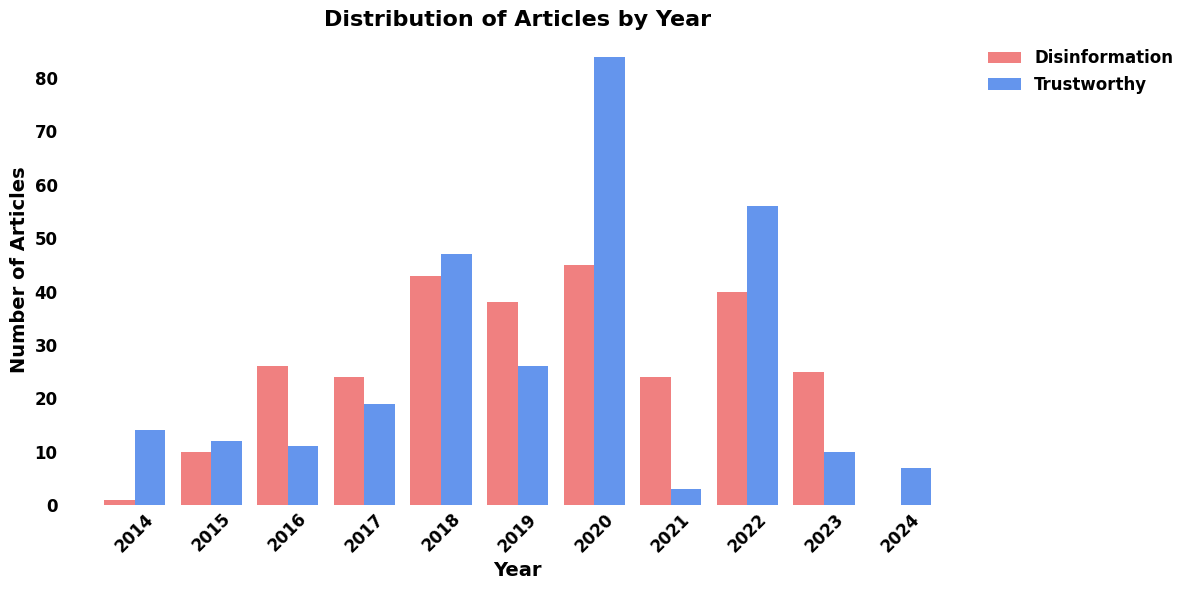

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = '/merged_disinfo_trustworthy.csv'
df = pd.read_csv(file_path)

# Parse full datetime string
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year
df['year'] = df['date'].dt.year

df_filtered = df[df['year'] >= 2014]

yearly_counts = df_filtered.groupby(['year', 'label']).size().unstack(fill_value=0)

yearly_counts = yearly_counts.sort_index()

plt.figure(figsize=(12, 6))
bar_width = 0.4
years = yearly_counts.index.astype(int)  # Ensure years are integers
x = range(len(years))

plt.bar([i - bar_width/2 for i in x], yearly_counts.get('disinfo', 0),
        width=bar_width, label='Disinformation', color='lightcoral')
plt.bar([i + bar_width/2 for i in x], yearly_counts.get('trustworthy', 0),
        width=bar_width, label='Trustworthy', color='cornflowerblue')

plt.xticks(ticks=x, labels=years, rotation=45, fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Articles', fontweight='bold', fontsize=14)
plt.title('Distribution of Articles by Year', fontweight='bold', fontsize=16)

# Add grid and legend with improved styling
# Add grid and legend with improved styling
legend = plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1),
                    frameon=False, framealpha=0.5, facecolor='white', edgecolor='none')
for text in legend.get_texts():
    text.set_fontweight('bold')  # Set fontweight to bold for legend text

plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.savefig('/distribution_clustered_bar_by_year.png', dpi=300)
plt.show()



# # Number of Articles Published Per Month
# df_sorted = df.sort_values(by='date')
# plt.figure(figsize=(10, 6))
# df_sorted.groupby(df_sorted['date'].dt.to_period('M')).size().plot(color='lightcoral')  # Red line for plot
# plt.xlabel('Year', fontweight='bold', fontsize=14)  # Bold xlabel
# plt.ylabel('Number of Articles', fontweight='bold', fontsize=14)  # Bold ylabel
# plt.xticks(rotation=45, fontweight='bold', fontsize=12)  # Bold x-axis labels
# plt.yticks(fontweight='bold', fontsize=12)  # Bold y-axis labels

# # Remove grid and spines (axes lines)
# plt.grid(False)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

# # Ensure no lines for the ticks, just labels
# plt.gca().tick_params(axis='both', which='both', length=0)

# plt.tight_layout()
# # Save the plot as a PNG image in the specified directory
# plt.savefig('/time_distribution/articles_per_month.png', dpi=300)
# plt.show()


In [ ]:
import pandas as pd

file_path = '/merged_disinfo_trustworthy.csv'
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
rows_1949 = df[df['year'] == 1949]

if not rows_1949.empty:
    print(f"Rows with year 1949 found at indices: {rows_1949.index.tolist()}\n")
    print(rows_1949)
else:
    print("No rows found with year 1949.")


Rows with year 1949 found at indices: [100]

                                          title  \
100  Article 13 - Humane treatment of prisoners   

                                     keywords article_publisher  \
100  war crimes, War in Ukraine, Human rights              icrc   

             article_domain  \
100  ihl-databases.icrc.org   

                                           article_url article_language  \
100  https://ihl-databases.icrc.org/applic/ihl/ihl....          English   

    debunk_date        class author                date  ...  \
100  04/08/2022  trustworthy    NaN 1949-08-12 02:00:00  ...   

                                         resolved_text  \
100  Legal instrument text is available in these la...   

                                          best_summary  \
100  Legal instrument text is available in these la...   

                                         rebel_triples best_method  \
100  [{'head': 'English', 'type': 'influenced by', ...         NaN   


In [ ]:
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
!pip uninstall -y numba
!pip install numba


Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 21.8 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
cudf-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is

In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from umap import UMAP

file_path = '/cleaned_disinformation.csv'
df = pd.read_csv(file_path)

texts = df['text'].fillna('').astype(str)

stop_words_list = list(ENGLISH_STOP_WORDS)

custom_stop_words = {'said', 'would', 'also', 'one', 'can', 'like', 'get', 'make', 'even',
    'people', 'know', 'anti', 'see', 'go', 'take', 'think', 'want', 'show',
    'use', 'come', 'say', 'tell', 'need', 'find', 'give', 'help', 'ask',
    'seem', 'work', 'try', 'feel', 'be', 'am', 'is', 'are', 'was', 'were',
    'been', 'being', 'have', 'has', 'had', 'having', 'rt', 'turkish', 'russian', 'ukrainian', 'syrian'}

stop_words_list.extend(custom_stop_words)

vectorizer = CountVectorizer(stop_words=stop_words_list)

umap_model = UMAP(n_components=2, random_state=42)

topic_model = BERTopic(vectorizer_model=vectorizer, umap_model=umap_model, nr_topics=10)  # Limit to 10 topics

topics, probs = topic_model.fit_transform(texts)

topics_overview = topic_model.get_topic_info()
print(topics_overview)

topic_model.visualize_topics()

fig = topic_model.visualize_topics()
fig.write_html("/BERTtopic/topic_visualization.html")



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                                 Name  \
0     -1     56  -1_russia_children_syria_government   
1      0    182        0_ukraine_russia_military_war   
2      1     11    1_china_coronavirus_covid19_virus   
3      2     17         2_chemical_opcw_douma_attack   
4      3     12            3_turkey_syria_border_oil   

                                      Representation  \
0  [russia, children, syria, government, uk, poli...   
1  [ukraine, russia, military, war, nato, preside...   
2  [china, coronavirus, covid19, virus, pandemic,...   
3  [chemical, opcw, douma, attack, report, weapon...   
4  [turkey, syria, border, oil, isis, aleppo, mil...   

                                 Representative_Docs  
0  [Soldiers wearing protective suits work at an ...  
1  [I have written several times about the contin...  
2  [Marked similarities exist between the interna...  
3  [A photo showing a child being washed after wh...  
4  [US demands Turkey to seal notorious 100 km bo..

Variants of visualisations for BERTopic [here](https://maartengr.github.io/BERTopic/index.html#visualizations).

In [ ]:
for topic_num in topics_overview["Topic"]:
    if topic_num != -1:  # Skip outliers if needed
        print(f"{topic_num}: {topic_model.get_topic(topic_num)}")


0: [('ukraine', np.float64(0.02990487656322489)), ('russia', np.float64(0.029382527641657535)), ('military', np.float64(0.018360322838196688)), ('war', np.float64(0.017967767312662492)), ('nato', np.float64(0.017755200993465017)), ('president', np.float64(0.015846966891671116)), ('western', np.float64(0.014931560229059376)), ('world', np.float64(0.014357376055572316)), ('kiev', np.float64(0.014203842485660255)), ('states', np.float64(0.013384152976824404))]
1: [('china', np.float64(0.05744275965094177)), ('coronavirus', np.float64(0.056484132852518014)), ('covid19', np.float64(0.030930549462776638)), ('virus', np.float64(0.027807857345932857)), ('pandemic', np.float64(0.025954000189537335)), ('health', np.float64(0.024027694697015798)), ('medical', np.float64(0.023024137475978916)), ('western', np.float64(0.022637200275941547)), ('chinas', np.float64(0.02200160602902913)), ('world', np.float64(0.020729172123298736))]
2: [('chemical', np.float64(0.11983211741665407)), ('opcw', np.float6

In [ ]:
new_labels = {
    3: "Russia-Ukraine & NATO War",
    2: "COVID-19 & China Narrative",
    1: "Chemical Attacks in Syria",
    0: "Turkey-Syria Border Conflict"
}


In [ ]:
topic_model.set_topic_labels(new_labels)


In [ ]:
topic_model.visualize_topics()

fig = topic_model.visualize_topics()
fig.write_html("/BERTtopic/topic_visualization.html")

In [ ]:
topic_counts = pd.Series(topics).value_counts()
print(topic_counts)


topic_model.set_topic_labels(new_labels)
doc_fig = topic_model.visualize_documents(texts, topics=topics, custom_labels=True)
doc_fig.write_html("/documents_visualization.html")


 0    182
-1     56
 2     17
 3     12
 1     11
Name: count, dtype: int64


In [ ]:
topic_sizes = {
    0: 182,
    2: 17,
    3: 12,
    1: 11,
}

topic_names = {
    0: "Ukraine-Russia War",
    1: "China Narratives",
    2: "Chemical Attacks",
    3: "Turkey-Syria Conflict",
}

for topic_id, size in topic_sizes.items():
    print(f"Topic {topic_id} ({topic_names.get(topic_id, 'Unknown')}): {size} documents")


Topic 0 (Ukraine-Russia War): 182 documents
Topic 2 (Chemical Attacks): 17 documents
Topic 3 (Turkey-Syria Conflict): 12 documents
Topic 1 (China Narratives): 11 documents


In [ ]:
import plotly.graph_objects as go

color_map = {
    "Ukraine-Russia War": '#007bff',    # electric blue
    "China Narratives": '#ff1744',       # bright neon red
    "Chemical Attacks": '#00e676',       # bright lime green
    "Turkey-Syria Conflict": '#ff9100',  # vivid orange
}

topic_names = {
    0: "Ukraine-Russia War",
    1: "China Narratives",
    2: "Chemical Attacks",
    3: "Turkey-Syria Conflict",
}

topic_model.set_topic_labels(topic_names)

doc_fig = topic_model.visualize_documents(texts, topics=topics, custom_labels=True)

traces_to_keep = []
for trace in doc_fig.data:
    if trace.name in color_map:
        trace.marker.color = color_map[trace.name]
        traces_to_keep.append(trace)

doc_fig.data = tuple(traces_to_keep)

doc_fig.update_traces(textposition='middle center', textfont_size=20)
doc_fig.update_layout(font=dict(size=16))

doc_fig.show()
doc_fig.write_html("documents_visualization_filtered.html")
